In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import scipy.signal as ss
import seaborn as sns
import numpy as np
from skimage.io import imread
from glob import glob
import os
import h5py

### Load data as dataframe

#### Read .pkl files for both single and combo mutants

In [2]:
sumPath = '/Users/zhengj10/Desktop/iGluSnFR'
df_single_1AP = pd.read_pickle(sumPath+'/iGluSnFR_screen_single_1AP.pkl')
df_combo_1AP = pd.read_pickle(sumPath+'/iGluSnFR_screen_combo_1AP.pkl')

df_single_20AP = pd.read_pickle(sumPath+'/iGluSnFR_screen_single_20AP.pkl')
df_combo_20AP = pd.read_pickle(sumPath+'/iGluSnFR_screen_combo_20AP.pkl')
df_combo_1AP.columns

Index(['date/plate', 'construct', 'no_pixels', 'thre', 'ctr_no_pixels', 'dFF',
       'fast_dF', 'fast_dFF', 'F0', 'tau_on', 'tau_off', 'dFF_Tau_on_ratio',
       'dFF_unnorm', 'fast_dF_unnorm', 'fast_dFF_unnorm', 'F0_unnorm',
       'tau_on_unnorm', 'tau_off_unnorm', 'ctr_dFF', 'ctr_fast_dF',
       'ctr_fast_dFF', 'ctr_F0', 'ctr_tau_on', 'ctr_tau_off',
       'ctr_dFF_Tau_on_ratio', 'construct_id', 'construct_id_dot'],
      dtype='object')

In [4]:
# df_combo_1AP.tail()


,date/plate,construct,no_pixels,thre,ctr_no_pixels,dFF,fast_dF,fast_dFF,F0,tau_on,...,tau_off_unnorm,ctr_dFF,ctr_fast_dF,ctr_fast_dFF,ctr_F0,ctr_tau_on,ctr_tau_off,ctr_dFF_Tau_on_ratio,construct_id,construct_id_dot
11778,20230313_iGluSnFR/P06a-20230227_iGluSnFR,pGP-AAV-hSyn-iGluSnFR_v857-WPRE Y31E K271G Q41...,694426,1.505741,177086,0.933275,1.494476,0.904285,1.652660,1.051561,...,0.554691,3.23884,9.028919,1.901508,4.748294,0.0168,5.553125,174.345188,633.9278,633dot9278
11779,20230313_iGluSnFR/P06a-20230227_iGluSnFR,pGP-AAV-hSyn-iGluSnFR_v857-WPRE Y31Q Q98F T254...,180105,1.505741,177086,0.425225,2.877985,0.746121,3.857262,2.036047,...,5.390778,3.23884,9.028919,1.901508,4.748294,0.0168,1.100366,46.505402,633.9298,633dot9298
11780,20230313_iGluSnFR/P06a-20230227_iGluSnFR,pGP-AAV-hSyn-iGluSnFR_v857-WPRE Y31Q Q34A Q98F...,331063,1.505741,177086,1.274110,2.162737,1.015662,2.129386,2.242605,...,2.613158,3.23884,9.028919,1.901508,4.748294,0.0168,1.705839,38.333065,633.9360,633dot9360
11781,20230313_iGluSnFR/P06a-20230227_iGluSnFR,pGP-AAV-hSyn-iGluSnFR_v857-WPRE Q34A Q98F T254...,501130,1.505741,177086,0.862334,1.852045,0.934943,1.980918,1.141128,...,0.709425,3.23884,9.028919,1.901508,4.748294,0.0168,5.380779,148.050651,633.9523,633dot9523
11782,20230313_iGluSnFR/P06a-20230227_iGluSnFR,pGP-AAV-hSyn-iGluSnFR_v857-WPRE Y31E H273E Q41...,373662,1.505741,177086,0.619176,2.353483,0.752228,3.128682,2.666766,...,3.977562,3.23884,9.028919,1.901508,4.748294,0.0168,1.219535,27.108732,633.9538,633dot9538


In [7]:
df_combo_1AP[(df_combo_1AP['construct'].str.contains('9147'))&(df_combo_1AP['no_pixels']>1e4)]['date/plate'].unique()

array(['20221017_iGluSnFR/P10a-20221003_iGluSnFR',
       '20230313_iGluSnFR/P06a-20230227_iGluSnFR'], dtype=object)

In [4]:
df_combo_1AP.sort_values(by='date/plate',ascending=False)['date/plate'].unique()

array(['20230313_iGluSnFR/P06a-20230227_iGluSnFR',
       '20230313_iGluSnFR/P05a-20230227_iGluSnFR',
       '20230313_iGluSnFR/P04a-20230227_iGluSnFR',
       '20230313_iGluSnFR/P02a-20230227_iGluSnFR',
       '20230313_iGluSnFR/P01a-20230227_iGluSnFR',
       '20230306_iGluSnFR/P06a-20230220_iGluSnFR',
       '20230306_iGluSnFR/P04a-20230220_iGluSnFR',
       '20230306_iGluSnFR/P03a-20230220_iGluSnFR',
       '20230306_iGluSnFR/P02a-20230220_iGluSnFR',
       '20230306_iGluSnFR/P01a-20230220_iGluSnFR',
       '20230227_iGluSnFR/P06a-20230213_iGluSnFR',
       '20230227_iGluSnFR/P05a-20230213_iGluSnFR',
       '20230227_iGluSnFR/P04a-20230213_iGluSnFR',
       '20230227_iGluSnFR/P03a-20230213_iGluSnFR',
       '20230227_iGluSnFR/P02a-20230213_iGluSnFR',
       '20230227_iGluSnFR/P01a-20230213_iGluSnFR',
       '20230220_iGluSnFR/P04a-20230206_iGluSnFR',
       '20230220_iGluSnFR/P03a-20230206_iGluSnFR',
       '20230220_iGluSnFR/P02a-20230206_iGluSnFR',
       '20230220_iGluSnFR/P01a-

In [7]:
# print(df_p.shape)
# df_p = df_p[df_p['no_pixels']>1e4]
# df_p = df_p.dropna()
# df_p.shape
df_combo_1AP[(df_combo_1AP['date/plate'].str.contains('20230227_iGluSnFR'))|(df_combo_1AP['date/plate'].str.contains('20230306_iGluSnFR'))|(df_combo_1AP['date/plate'].str.contains('20230313_iGluSnFR'))].construct_id.unique().shape

(27,)

<ErrorbarContainer object of 3 artists>

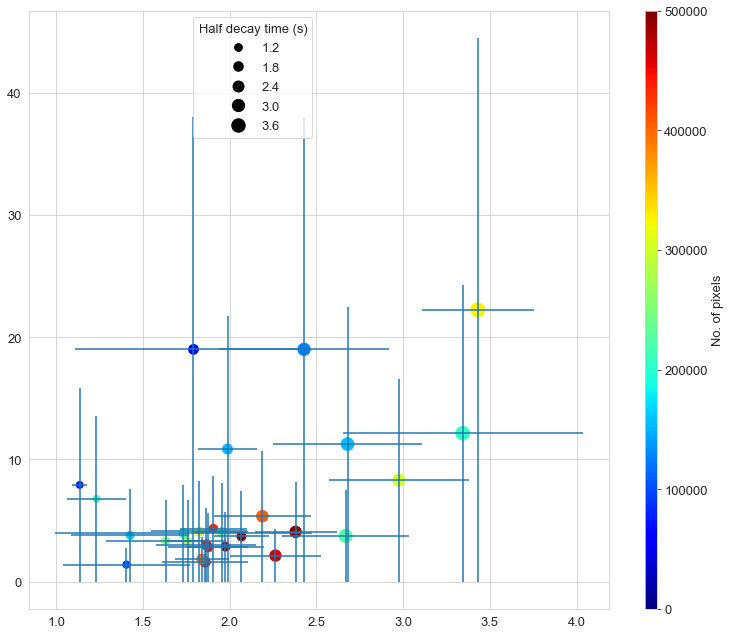

In [12]:
import matplotlib
sns.set_style(style='whitegrid')
plt.rc('font', size=13)
fig = plt.figure(figsize=(13,11))
ax = plt.subplot(111)

fast_dF = []
tau_off = []
no_pixels = []
F0 = []

fast_dF_sem = []
tau_off_sem = []
no_pixels_sem = []
F0_sem = []

df_p = pd.DataFrame()
for c in df_combo_1AP[(df_combo_1AP['date/plate'].str.contains('20230227_iGluSnFR'))|(df_combo_1AP['date/plate'].str.contains('20230306_iGluSnFR'))|(df_combo_1AP['date/plate'].str.contains('20230313_iGluSnFR'))].construct_id.unique():
    df_temp = df_combo_1AP[df_combo_1AP['construct_id']==c]
    
    fast_dF.append(df_temp['fast_dF'].mean())
    tau_off.append(df_temp['tau_off'].mean())
    no_pixels.append(df_temp['no_pixels'].mean())
    F0.append(df_temp['F0'].mean())
    
    fast_dF_sem.append(df_temp['fast_dF'].sem())
    tau_off_sem.append(df_temp['tau_off'].sem())
    no_pixels_sem.append(df_temp['no_pixels'].sem())
    F0_sem.append(df_temp['F0'].mean())
    
df_p['fast_dF'] = fast_dF
df_p['tau_off'] = tau_off
df_p['no_pixels'] = no_pixels
df_p['F0'] = F0

df_p['fast_dF_sem'] = fast_dF_sem
df_p['tau_off_sem'] = tau_off_sem
df_p['no_pixels_sem'] = no_pixels_sem
df_p['F0_sem'] = F0_sem

scale = 50
all_sensors = plt.scatter(df_p['fast_dF'],df_p['tau_off'],c=df_p['no_pixels'],s=df_p['F0']*scale,cmap="jet")

plt.clim(0,5e5)
cbar = plt.colorbar(all_sensors,aspect=50)
cbar.ax.set_ylabel('No. of pixels', rotation=90,size=13)

plt.legend(*all_sensors.legend_elements("sizes", num = 5, func = lambda x: x/scale), title='Half decay time (s)',
          bbox_to_anchor=(0.5,1))

# Add errorbar to scatter plot
cmap = matplotlib.cm.get_cmap('jet')
norm = matplotlib.colors.Normalize(0,28)

plt.errorbar(df_p['fast_dF'],df_p['tau_off'],fmt='o',markersize=0,xerr=df_p['fast_dF_sem'],yerr=df_p['tau_off'])

In [101]:
# df_p['no_pixels'].to_list()
# df_p.dropna()
# df_p

0.0

In [ ]:
import matplotlib
sns.set_style(style='whitegrid')
# fig = plt.figure(figsize=(14,12))
# fig = plt.figure(figsize=(13,10))
fig = plt.figure(figsize=(13,11))
plt.rc('font', size=13)
ax = plt.subplot(111)

# scale = 200 # 001FP
scale = 75 # 003FP
# scale = 50 # 010FP
# scale = 30 # 160FP

constrol = plt.scatter(df_sel_control.dFF_peak.mean()*100,df_sel_control.F0.mean(),
                       c=df_sel_control.Half_rise.mean(),s=df_sel_control.Half_decay.mean()*scale,
                       cmap="jet",marker='x')
all_sensors = plt.scatter(df_plot_mean['Peak \u0394F/F0'],df_plot_mean['F0'],c=df_plot_mean['Half rise time (s)'],
                          s=df_plot_mean['Half decay time (s)']*scale,cmap="jet")

# plt.clim(0.5,0.75) # if using ax.scatter for above plot plt.clim will ask an image to be defined first
plt.clim(0,0.5)
cbar = plt.colorbar(all_sensors,aspect=50)

cbar.ax.set_ylabel('Half rise time (s)', rotation=90,size=13)

construct_l = df_plot_mean.Construct.to_list()
F0_l = df_plot_mean.F0.to_list()
dFF_l = df_plot_mean['Peak \u0394F/F0'].to_list()


text_height = (ax.get_ylim()[1]-ax.get_ylim()[0])/40
# text_height = 37500

# for i,construct in enumerate(construct_l):
#     if construct == '139dot1':
#         ax.text(dFF_l[i], F0_l[i]+text_height, "%s" %construct.replace('dot','.'), ha="center", color='r',size=12)
#     else:
#         if df_plot_mean[df_plot_mean['Construct']==construct]['Peak \u0394F/F0'].to_list()[0]>df_sel_control.dFF_peak.mean()*100:
#             ax.text(dFF_l[i], F0_l[i]+text_height, "%s" %construct.replace('dot','.').split('G')[0], ha="center", size=12)

for i,construct in enumerate(construct_l):
    ax.text(dFF_l[i], F0_l[i]+text_height, "%s" %construct.replace('dot','.'), ha="center",size=12)

# ax.text(df_sel_control.dFF_peak.mean()*100, df_sel_control.F0.mean()+text_height, '139.1', ha="center",size=12) 


ax.set_xlabel('\u0394F/F0 (%) - ' +stim, size=14)
ax.set_ylabel('F0',size=14)

# # ax.set_yscale('log')
# # ax.set_xscale('log')

plt.legend(*all_sensors.legend_elements("sizes", num = 5, func = lambda x: x/scale), title='Half decay time (s)',
          bbox_to_anchor=(0.5,1))

## Add errorbar to scatter plot
cmap = matplotlib.cm.get_cmap('jet')
norm = matplotlib.colors.Normalize(0,0.5)

plt.errorbar(df_sel_control.dFF_peak.mean()*100,df_sel_control.F0.mean(),xerr=df_sel_control.dFF_peak.sem()*100,
            fmt='o', markersize=0,c=cmap(norm(df_plot_mean['Half rise time (s)'])))
plt.errorbar(df_plot_mean['Peak \u0394F/F0'],df_plot_mean['F0'],xerr=df_plot_mean['Peak \u0394F/F0 sem'],
             fmt='o', markersize=0,c=cmap(norm(df_plot_mean['Half rise time (s)'])))

plt.errorbar(df_sel_control.dFF_peak.mean()*100,df_sel_control.F0.mean(),yerr=df_sel_control.F0.sem(),
            fmt='o', markersize=0,c=cmap(norm(df_plot_mean['Half rise time (s)'])))
plt.errorbar(df_plot_mean['Peak \u0394F/F0'],df_plot_mean['F0'],yerr=df_plot_mean['F0 sem'],
             fmt='o', markersize=0,c=cmap(norm(df_plot_mean['Half rise time (s)'])))

plt.tick_params(labelsize=13)
plt.tight_layout()
# fig.savefig(savePath+'\\mScarlet_Kerr_%s.png' %stim,dpi=1200)
plt.show()

In [35]:
df_combo_1AP

,date/plate,construct,no_pixels,thre,ctr_no_pixels,dFF,fast_dF,fast_dFF,F0,tau_on,...,tau_off_unnorm,ctr_dFF,ctr_fast_dF,ctr_fast_dFF,ctr_F0,ctr_tau_on,ctr_tau_off,ctr_dFF_Tau_on_ratio,construct_id,construct_id_dot
9157,20220715_iGluSnFR/P03b-20220627_iGluSnFR,pGP-AAV-hSyn-iGluSnFR_v857-WPRE Y31Q Q34A Q98F...,73,1.217231,161772,NaN,NaN,NaN,NaN,NaN,...,NaN,2.690437,NaN,NaN,NaN,NaN,NaN,NaN,633.7887,633dot7887
9158,20220715_iGluSnFR/P03b-20220627_iGluSnFR,pGP-AAV-hSyn-iGluSnFR_v857-WPRE Q98F K271F Q41...,452490,1.217231,161772,2.396192,1.322738,1.415954,0.934168,1.211474,...,0.421800,2.690437,10.557651,1.724277,6.122944,0.015948,5.671562,114.945058,633.7888,633dot7888
9159,20220715_iGluSnFR/P03b-20220627_iGluSnFR,pGP-AAV-hSyn-iGluSnFR_v857-WPRE Y31Q Q34A A185...,0,1.217231,161772,NaN,NaN,NaN,NaN,NaN,...,NaN,2.690437,NaN,NaN,NaN,NaN,NaN,NaN,633.7891,633dot7891
9160,20220715_iGluSnFR/P03b-20220627_iGluSnFR,pGP-AAV-hSyn-iGluSnFR_v857-WPRE A185N K271G H2...,10381,1.217231,161772,0.647413,1.343134,0.867353,1.548543,1.929418,...,4.617123,2.690437,10.557651,1.724277,6.122944,0.015948,0.526118,45.317452,633.7892,633dot7892
9161,20220715_iGluSnFR/P03b-20220627_iGluSnFR,pGP-AAV-hSyn-iGluSnFR_v857-WPRE Y31Q Q98F N499...,278538,1.217231,161772,2.682088,1.538973,1.037515,1.483326,2.530928,...,1.276434,2.690437,10.557651,1.724277,6.122944,0.015948,2.180561,26.336551,633.7895,633dot7895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11680,20230227_iGluSnFR/P06a-20230213_iGluSnFR,pGP-AAV-hSyn-iGluSnFR_v857-WPRE Y31E Q98F K271...,2148,1.355934,7654,0.796477,1.108304,1.066882,1.038826,0.592599,...,0.132697,2.440094,7.254027,1.797156,4.036391,0.019235,10.931752,361.237171,633.9147,633dot9147
11681,20230227_iGluSnFR/P06a-20230213_iGluSnFR,pGP-AAV-hSyn-iGluSnFR_v857-WPRE Y31E T254R H27...,0,1.355934,7654,NaN,NaN,NaN,NaN,NaN,...,NaN,2.440094,NaN,NaN,NaN,NaN,NaN,NaN,633.9161,633dot9161
11682,20230227_iGluSnFR/P06a-20230213_iGluSnFR,pGP-AAV-hSyn-iGluSnFR_v857-WPRE Y31E K271G Q41...,505651,1.355934,7654,1.762962,1.625247,1.075894,1.510601,1.053680,...,0.692561,2.440094,7.254027,1.797156,4.036391,0.019235,3.071531,114.260605,633.9278,633dot9278
11683,20230227_iGluSnFR/P06a-20230213_iGluSnFR,pGP-AAV-hSyn-iGluSnFR_v857-WPRE Y31Q Q34A Q98F...,42585,1.355934,7654,1.667620,1.153683,0.922183,1.251035,1.837482,...,1.825706,2.440094,7.254027,1.797157,4.036391,0.019235,0.827083,37.572313,633.9360,633dot9360


In [6]:
df_plot_s = df_single_1AP[df_single_1AP['no_pixels']>1e4]
df_plot_s = df_plot_s.dropna()

df_plot_c = df_combo_1AP[df_combo_1AP['no_pixels']>1e4]
df_plot_c = df_plot_c.dropna()

df_single_1AP.columns

Index(['date/plate', 'construct', 'no_pixels', 'thre', 'ctr_no_pixels', 'dFF',
       'fast_dF', 'fast_dFF', 'F0', 'tau_on', 'tau_off', 'dFF_Tau_on_ratio',
       'dFF_unnorm', 'fast_dF_unnorm', 'fast_dFF_unnorm', 'F0_unnorm',
       'tau_on_unnorm', 'tau_off_unnorm', 'ctr_dFF', 'ctr_fast_dF',
       'ctr_fast_dFF', 'ctr_F0', 'ctr_tau_on', 'ctr_tau_off',
       'ctr_dFF_Tau_on_ratio', 'construct_id', 'construct_id_dot'],
      dtype='object')

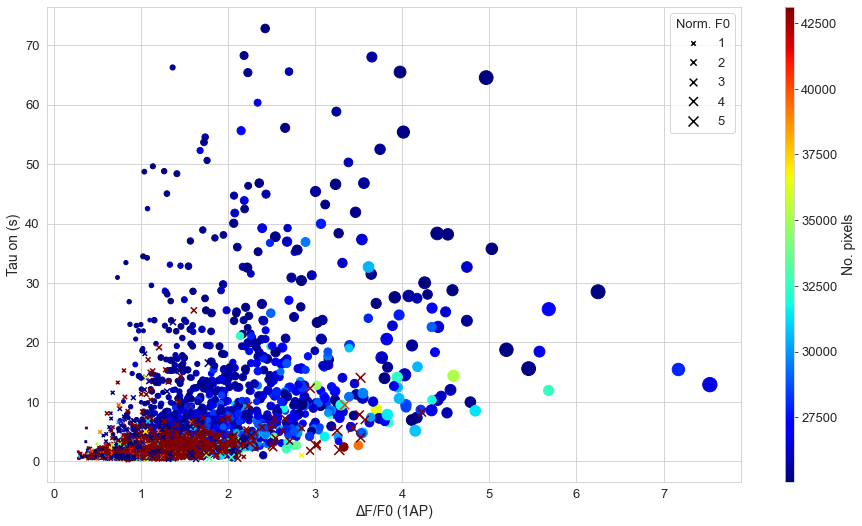

In [19]:
sns.set_style(style='whitegrid')
fig = plt.figure(figsize=(13,7.5))
plt.rc('font', size=13)
ax = plt.subplot(111)

scale = 20 # for combo mutants


all_sensors = plt.scatter(df_plot_c['fast_dF'],df_plot_c['tau_off'],c=df_plot_c['no_pixels'],
                          s=df_plot_c['F0']*scale,cmap="jet")
all_sensors = plt.scatter(df_plot_s['fast_dF'],df_plot_s['tau_off'],c=df_plot_s['no_pixels'],marker='x',
                          s=df_plot_s['F0']*scale,cmap="jet")


# all_sensors = plt.scatter(df_plot_c['dFF_unnorm'],df_plot_c['tau_on_unnorm'],c=df_plot_c['no_pixels'],
#                           s=df_plot_c['F0']*scale,cmap="jet")
# all_sensors = plt.scatter(df_plot_s['dFF_unnorm'],df_plot_s['tau_on_unnorm'],c=df_plot_s['no_pixels'],marker='x',
#                           s=df_plot_s['F0']*scale,cmap="jet")

plt.clim(a,b)
cbar = plt.colorbar(all_sensors,aspect=50)
cbar.ax.set_ylabel('No. pixels',rotation=90,size=14)

plt.legend(*all_sensors.legend_elements("sizes", num = 5,func = lambda x: x/scale),title='Norm. F0')
ax.set_xlabel('\u0394F/F0 (1AP)',size=14)
ax.set_ylabel('Tau on (s)',size=14)


plt.tight_layout()
savePath = '/Volumes/genie/Presentations/Jihong/GENIE production/230117/iGluSnFR_screening'
if not os.path.exists(savePath):
    os.makedirs(savePath)
# plt.savefig(savePath+'/Kerr_all_%s.svg', %paramformat='svg')
# plt.savefig('/Users/zhengj10/Desktop/20AP.pdf',format='pdf')
plt.show()

In [18]:
a = np.quantile(df_plot_c['no_pixels'],0.1)
b = np.quantile(df_plot_c['no_pixels'],0.2)
ax.get_xlim()

(-0.08029955244854048, 7.893521580739835)

In [25]:
df_plot_c[df_plot_c['dFF_unnorm']>10]

In [30]:
df_winner = df_plot_c[df_plot_c['fast_dF']>2]
for i,r in df_winner.iterrows():
    if '202302' in r['date/plate']:
        print(r['construct_id'])

633.9298
633.9330
633.9360
633.9523
633.9538
633.8366
633.7895
633.9523
633.8110
633.8179
633.7895
633.8626
633.9330
633.9538
633.8179
633.8357
633.8366
633.7895
633.8179
633.8357
633.8439
633.9330
633.9538


In [27]:
df_plot_s[df_plot_s['dFF_unnorm']>15]

,date/plate,construct,no_pixels,thre,ctr_no_pixels,dFF,fast_dF,fast_dFF,F0,tau_on,...,tau_off_unnorm,ctr_dFF,ctr_fast_dF,ctr_fast_dFF,ctr_F0,ctr_tau_on,ctr_tau_off,ctr_dFF_Tau_on_ratio,construct_id,construct_id_dot
6784,20210927_iGluSnFR/P23a-20210913_iGluSnFR,pGP-AAV-hSyn-iGluSnFR_v857-WPRE N499V.633.6391...,656946,1.358324,388531,4.865604,1.309710,2.027897,0.645846,1.229113,...,1.298087,3.116897,18.955766,1.621684,11.68894,0.020334,7.895046,101.464363,633.6391,633dot6391
7611,20211018_iGluSnFR/P03a-20211004_iGluSnFR,pGP-AAV-hSyn-iGluSnFR_v857-WPRE Y82F.633.4058;...,163455,1.243347,214434,1.381540,1.808245,2.518018,0.718122,1.078325,...,2.653216,13.331852,16.212574,2.184409,7.42195,0.052368,19.265753,218.939731,633.4058,633dot4058


In [ ]:
# df_combo_1AP.construct.unique().shape

In [ ]:
# df_combo_1AP
# df_top = pd.read_excel('/Users/zhengj10/Desktop/30.xlsx')

In [ ]:
# for i,r in df_top.iterrows():
#     a = str(r['ID (633.)']).split('.')[0]
# #     df_temp = df_combo_1AP[df_combo_1AP['construct'].str.contains(a)]
#     df_temp = df_single_1AP[df_single_1AP['construct'].str.contains(a)]
#     if len(df_temp)==0:
#         continue
#     print(len(df_temp),a,df_temp['fast_dF'].values[0])

In [ ]:
# df_single_1AP[df_single_1AP['construct'].str.contains('633.182')]

In [ ]:
# c.values[0]

#### Merge 1AP and 20 AP such that each 1AP data has corresponding 20AP data

In [ ]:
df_c_1 = pd.DataFrame()
df_c_20 = pd.DataFrame()
for c in df_combo_1AP.construct.unique():
    df_t_1 = df_combo_1AP[df_combo_1AP['construct']==c]
    df_t_20 = df_combo_20AP[df_combo_20AP['construct']==c]
    df_c_1 = pd.concat([df_c_1,df_t_1],axis=0)
    df_c_20 = pd.concat([df_c_20,df_t_20],axis=0)
    
df_s_1 = pd.DataFrame()
df_s_20 = pd.DataFrame()
for c in df_single_1AP.construct.unique():
    df_t_1 = df_single_1AP[df_single_1AP['construct']==c]
    df_t_20 = df_single_20AP[df_single_20AP['construct']==c]
    df_s_1 = pd.concat([df_s_1,df_t_1],axis=0)
    df_s_20 = pd.concat([df_s_20,df_t_20],axis=0)

In [ ]:
df_combo = pd.concat([df_c_1,df_c_20],axis=1)
df_single = pd.concat([df_s_1,df_s_20],axis=1)

#### Rename columns to distuiguish 1AP and 20AP data

In [ ]:
df_combo.columns = ['date/plate', 'construct', 'no_pixels', 'thre', 'ctr_no_pixels', 'SNR',
       'dFF', 'fast_dF', 'fast_dFF', 'F0', 'tau_on', 'tau_off',
       'dFF_Tau_on_ratio', 'SNR_unnorm', 'dFF_unnorm', 'fast_dFF_unnorm',
       'F0_unnorm', 'tau_on_unnorm', 'tau_off_unnorm', 'ctr_SNR', 'ctr_dFF',
       'ctr_fast_dF', 'ctr_fast_dFF', 'ctr_F0', 'ctr_tau_on', 'ctr_tau_off',
       'ctr_dFF_Tau_on_ratio', 'construct_id', 'date/plate_20AP', 'construct_20AP',
       'no_pixels_20AP', 'thre', 'ctr_no_pixels', 'SNR', 'dFF_20AP', 'fast_dF_20AP',
       'fast_dFF', 'F0_20AP', 'tau_on', 'tau_off', 'dFF_Tau_on_ratio', 'SNR_unnorm',
       'dFF_unnorm', 'fast_dFF_unnorm', 'F0_unnorm', 'tau_on_unnorm',
       'tau_off_unnorm', 'ctr_SNR', 'ctr_dFF', 'ctr_fast_dF', 'ctr_fast_dFF',
       'ctr_F0', 'ctr_tau_on', 'ctr_tau_off', 'ctr_dFF_Tau_on_ratio',
       'construct_id_20AP']

df_single.columns = ['date/plate', 'construct', 'no_pixels', 'thre', 'ctr_no_pixels', 'SNR',
       'dFF', 'fast_dF', 'fast_dFF', 'F0', 'tau_on', 'tau_off',
       'dFF_Tau_on_ratio', 'SNR_unnorm', 'dFF_unnorm', 'fast_dFF_unnorm',
       'F0_unnorm', 'tau_on_unnorm', 'tau_off_unnorm', 'ctr_SNR', 'ctr_dFF',
       'ctr_fast_dF', 'ctr_fast_dFF', 'ctr_F0', 'ctr_tau_on', 'ctr_tau_off',
       'ctr_dFF_Tau_on_ratio', 'construct_id', 'date/plate_20AP', 'construct_20AP',
       'no_pixels_20AP', 'thre', 'ctr_no_pixels', 'SNR', 'dFF_20AP', 'fast_dF_20AP',
       'fast_dFF', 'F0_20AP', 'tau_on', 'tau_off', 'dFF_Tau_on_ratio', 'SNR_unnorm',
       'dFF_unnorm', 'fast_dFF_unnorm', 'F0_unnorm', 'tau_on_unnorm',
       'tau_off_unnorm', 'ctr_SNR', 'ctr_dFF', 'ctr_fast_dF', 'ctr_fast_dFF',
       'ctr_F0', 'ctr_tau_on', 'ctr_tau_off', 'ctr_dFF_Tau_on_ratio',
       'construct_id_20AP']

#### Confirm each row is the 1AP and 20AP data from same construct & well

In [ ]:
for i,r in df_combo.iterrows():
    if r['construct']!=r['construct_20AP']:
        print(i,r['construct'],r['construct_20AP'])
for i,r in df_single.iterrows():
    if r['construct']!=r['construct_20AP']:
        print(i,r['construct'],r['construct_20AP'])

In [ ]:
param = 'dFF'
# param = 'fast_dF'
# param = 'fast_dFF'
# param = 'dFF_tau_on_ratio'
# param = 'tau_on'

In [ ]:
df_combo.shape

#### Exclude NA values from plotted parameters only (instead of using df.dropna())

In [ ]:
df_combo = df_combo[df_combo['no_pixels']>1e4]
df_combo = df_combo[(df_combo['fast_dF'].notna())&(df_combo['dFF_20AP'].notna())&(df_combo['F0'].notna())]
df_combo = df_combo.sort_values(by=param,ascending=False)

df_single = df_single[df_single['no_pixels']>1e4]
df_single = df_single[(df_single['fast_dF'].notna())&(df_single['dFF_20AP'].notna())&(df_single['F0'].notna())]
df_single = df_single.sort_values(by=param,ascending=False)

In [ ]:
# df_single[df_single['construct'].str.contains('6428')]
# df_combo[df_combo['construct'].str.contains('9139')]
# df_combo.loc[10251,'construct']

#### Kerr plot (fast dF_1AP vs. dFF_20AP)

In [ ]:
sns.set_style(style='whitegrid')
fig = plt.figure(figsize=(13,7.5))
plt.rc('font', size=13)
ax = plt.subplot(111)

scale = 20 # for combo mutants
all_sensors = plt.scatter(df_combo[param],df_combo['dFF_20AP'],c=df_combo['no_pixels'],s=df_combo['F0']*scale,
                          cmap="jet")

all_sensors = plt.scatter(df_single[param],df_single['dFF_20AP'],c=df_single['no_pixels'],s=df_single['F0']*scale,
                          marker='x',cmap="jet")
plt.clim(a,b)
cbar = plt.colorbar(all_sensors,aspect=50)
cbar.ax.set_ylabel('No. pixels',rotation=90,size=14)

plt.legend(*all_sensors.legend_elements("sizes", num = 5,func = lambda x: x/scale),title='Norm. F0')
ax.set_xlabel('Norm. fast \u0394F (1AP)',size=14)
ax.set_ylabel('Norm. \u0394F/F0 (20AP)',size=14)


plt.tight_layout()
savePath = '/Volumes/genie/Presentations/Jihong/GENIE production/230117/iGluSnFR_screening'
if not os.path.exists(savePath):
    os.makedirs(savePath)
# plt.savefig(savePath+'/Kerr_all_%s.svg', %paramformat='svg')
# plt.savefig('/Users/zhengj10/Desktop/20AP.pdf',format='pdf')
plt.show()

In [ ]:
a = np.quantile(df_single['no_pixels'],0.1)
b = np.quantile(df_combo['no_pixels'],0.9)
ax.get_xlim()

#### Kerr plot zoomed for top hits (fast dF_1AP vs. dFF_20AP)

In [ ]:
sns.set_style(style='whitegrid')
fig = plt.figure(figsize=(13,7.5))
plt.rc('font', size=13)
ax = plt.subplot(111)

scale = 20 # for combo mutants
df_combo = df_combo[df_combo['fast_dF']<6]
all_sensors = plt.scatter(df_combo[param],df_combo['dFF_20AP'],c=df_combo['no_pixels'],s=df_combo['F0']*scale,
                          cmap="jet")

all_sensors = plt.scatter(df_single[param],df_single['dFF_20AP'],c=df_single['no_pixels'],s=df_single['F0']*scale,
                          marker='x',cmap="jet")

plt.clim(a,b)
cbar = plt.colorbar(all_sensors,aspect=50)
cbar.ax.set_ylabel('No. pixels',rotation=90,size=14)
plt.legend(*all_sensors.legend_elements("sizes", num = 5,func = lambda x: x/scale),title='Norm. F0')

ax.set_xlabel('Norm. fast \u0394F (1AP)',size=14)
ax.set_ylabel('Norm. \u0394F/F0 (20AP)',size=14)

ax.set_xlim([2.9, 6])

construct_l = df_combo.construct.to_list()
dFF_l = df_combo['dFF_20AP'].to_list()
fast_dF_l = df_combo.fast_dF.to_list()

top_hits_full = []
top_hits = []

text_height = (ax.get_ylim()[0]+ax.get_ylim()[1])/40
for i,construct in enumerate(construct_l):
    
    
    if fast_dF_l[i]>3:
        if ';' in construct:
            if construct.split(';')[0][-5]=='.':
                ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct.split(';')[0][-8:], ha="center",size=12)
                top_hits.append(construct.split(';')[0][-8:])
                top_hits_full.append(construct)
            else:
                ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct.split(';')[0][-7:], ha="center",size=12)
                top_hits.append(construct.split(';')[0][-7:])
                top_hits_full.append(construct)

        elif construct[-5]=='.':
            ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct[-8:], ha="center",size=12)
            top_hits.append(construct[-8:])
            top_hits_full.append(construct)

        else:
            ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct[-7:], ha="center",size=12)
            top_hits.append(construct[-7:])
            top_hits_full.append(construct)
            
construct_l = df_single.construct.to_list()
dFF_l = df_single['dFF_20AP'].to_list()
fast_dF_l = df_single.fast_dF.to_list()

top_hits_full = []
top_hits = []

text_height = (ax.get_ylim()[0]+ax.get_ylim()[1])/40
for i,construct in enumerate(construct_l):
    if '9187' in construct_l[i]:
        ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct.split(';')[0][-7:], ha="center",size=15,color='r')
        print('haha')
    if fast_dF_l[i]>3 and fast_dF_l[i]<6:
        if ';' in construct:
            if construct.split(';')[0][-5]=='.':
                ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct.split(';')[0][-8:], ha="center",size=12)
                top_hits.append(construct.split(';')[0][-8:])
                top_hits_full.append(construct)
            else:
                ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct.split(';')[0][-7:], ha="center",size=12)
                top_hits.append(construct.split(';')[0][-7:])
                top_hits_full.append(construct)

        elif construct[-5]=='.':
            ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct[-8:], ha="center",size=12)
            top_hits.append(construct[-8:])
            top_hits_full.append(construct)

        else:
            ax.text(fast_dF_l[i],dFF_l[i]+text_height, "%s" %construct[-7:], ha="center",size=12)
            top_hits.append(construct[-7:])
            top_hits_full.append(construct)

plt.tight_layout()
savePath = '/Volumes/genie/Presentations/Jihong/GENIE production/230117/iGluSnFR_screening'
if not os.path.exists(savePath):
    os.makedirs(savePath)
# plt.savefig(savePath+'/Kerr_all_zoom.svg',format='svg')
# plt.savefig('/Users/zhengj10/Desktop/20AP.pdf',format='pdf')
plt.show()


In [ ]:
top_hits

In [ ]:
# df_single.to_excel(sumPath+'/single_1AP.xlsx')
# df_combo.to_excel(sumPath+'/combo_1AP.xlsx')

#### dFF traces of top hits

In [47]:
# top_hits = ['633dot4515',
# '633dot4484',
# '633dot3486',
# '633dot4147',
# '633dot233',
# '633dot2043',
# '633dot2653',
# '633dot2698',
# '633dot2185',
# '633dot5800',
# '633dot6412',
# '633dot6391']

top_hits = ['633dot9530']

# top_hits = ['633dot8663','633dot8802','633dot9103','633dot9167','633dot8902','633dot9075']

In [48]:
dataPath = '/Volumes/genie/BenArthur/GETI-screen/kaspars-method-v2'

In [49]:
df_single = df_plot_c

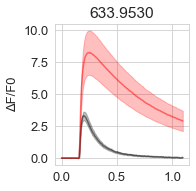

In [50]:
plt.figure(figsize=[13,5])
plt.rc('font', size=13)
sp = 1
stim = '1AP'
ctr = '556dot857'
bad_plates = [ '20211018_iGluSnFR/P03a-20211004_iGluSnFR',
 '20220316_iGluSnFR/P02a-20220228_iGluSnFR',
 '20211018_iGluSnFR/P03a-20211004_iGluSnFR']
# bad_plates = []
for c in top_hits:
    df_sel = df_single[df_single.construct.str.contains(c.replace('dot','.'))]
#     df_sel = df_combo[df_combo.construct.str.contains(c.replace('dot','.'))]
    matFiles = []
    dFF_ctr = []
    dFF_mutant = []
    for d in df_sel['date/plate'].unique():
        if d in bad_plates:
            print(d)
            continue

        date = d[:17]
        plate = d[18:]
        matFiles = glob(os.path.join(dataPath,date,plate,c.replace('.','dot'))+'/*%s.mat' %stim)
        matFiles_ctr = glob(os.path.join(dataPath,date,plate,'556dot857')+'/*%s.mat' %stim)
        matFiles_mutant = [m for m in matFiles if c.replace('.','dot') in m and stim in m]
        for f in matFiles_ctr:
            matData = h5py.File(f,'r')
            dFF_trace = matData['responsive_traces']['fit']['bleach_bkg_norm_ave_trace'][()]
            if dFF_trace.shape[0]!=540:
                continue
            dFF_ctr.append(dFF_trace)
        if len(dFF_ctr)==0:
            print(d)
            continue
            
        for f in matFiles_mutant:
            matData = h5py.File(f,'r')
            dFF_trace = matData['responsive_traces']['fit']['bleach_bkg_norm_ave_trace'][()]
            if dFF_trace.shape[0]!=540:
                continue
            dFF_mutant.append(dFF_trace)
        if len(dFF_mutant)==0:
            print(d)
            continue
            
    mean = np.nanmean(dFF_ctr,axis=0)
    err = np.nanstd(dFF_ctr,axis=0)/np.sqrt(len(dFF_ctr))
    mean = mean[100:300]
    err = err[100:300]
    
    x = np.arange(mean.shape[0])/181.4815
    x = x[:200]

    ax = plt.subplot(2,6,sp)
    ax.plot(x,mean,color='k',alpha=0.5)
    ax.fill_between(x,mean+err,mean-err,color='k',alpha=0.25)
    
    mean = np.nanmean(dFF_mutant,axis=0)
    err = np.nanstd(dFF_mutant,axis=0)/np.sqrt(len(dFF_mutant))
    mean = mean[100:300]
    err = err[100:300]
    
    ax.plot(x,mean,color='r',alpha=0.5)
    ax.fill_between(x,mean+err,mean-err,color='r',alpha=0.25)
    ax.set_title(c.replace('dot','.'))
    if sp in [1,7]:
        ax.set_ylabel('\u0394F/F0',size=13)
    if sp>6:
        ax.set_xlabel('s',size=13)
    sp+=1
plt.tight_layout()
# plt.savefig(savePath+'/dFF_traces_single_%s_%s.svg' %(param,stim),format='svg')
# plt.savefig(savePath+'/dFF_traces_combo_top_hits_low_dFF_%s.svg' %stim,format='svg')
plt.show()

In [ ]:
C = []
for i,r in df_single[df_single['dFF']>3].iterrows():
    top_hits.append(r['construct_id'].split(';')[0])

In [ ]:
top_hits

In [ ]:
# matFiles
# dFF_trace.shape
matFiles_ctr
# matFiles_mutant
# dFF_mutant

In [ ]:
dFF_trace

In [ ]:
# d
# mean
# df_sel
c = '633dot9139'
# 6428, 9187, 9139
df_combo[df_combo.construct.str.contains(c.replace('dot','.'))]
# df_single_1AP[df_single_1AP.construct.str.contains(c.replace('dot','.'))]

#### Check individual dFF traces and remove plates with bad in-plate control

In [ ]:
plt.figure(figsize=[13,5])
plt.rc('font', size=13)
sp = 1
stim = '1AP'
ctr = '556dot857'
c = '633dot4147'
df_sel = df_single[df_single.construct.str.contains(c.replace('dot','.'))]
matFiles = []
dFF_ctr = []
dFF_mutant = []
for d in ['20210706_iGluSnFR/P29a-20210621_iGluSnFR']:
# for d in df_sel['date/plate'].unique():
    date = d[:17]
    plate = d[18:]
    matFiles = glob(os.path.join(dataPath,date,plate)+'/*.mat')
    matFiles_ctr = [m for m in matFiles if ctr in m and stim in m]
    matFiles_mutant = [m for m in matFiles if c in m and stim in m]
    for f in matFiles_ctr:
        matData = h5py.File(f,'r')
        dFF_trace = matData['responsive_traces']['fit']['bleach_bkg_norm_ave_trace'][()]
        if dFF_trace.shape[0]!=540:
            continue
        dFF_ctr.append(dFF_trace)
        plt.plot(dFF_trace)
    if len(dFF_ctr)==0:
#         print(d)
        continue
    
plt.tight_layout()
plt.show()

#### Videos of top hits

#### Rescreening list
- Poor control
- Top hits

In [ ]:
# df_plot_sel.columns

In [ ]:
stim = '1AP'
df_ben = pd.read_csv(sumPath+'/good_%s.csv' %stim)
df_plot = pd.DataFrame()

In [ ]:
df_plot['date/plate'] = df_ben['transfect/plate']
df_plot['construct'] = df_ben['construct']
df_plot['no_pixels'] = df_ben['#pixels<sub>&nbsp;</sub>']
df_plot['thre'] = 1+(df_ben['ctrl pdi<sub>&nbsp;</sub>']/100.0)
df_plot['ctr_no_pixels'] = df_ben['ctrl #pix<sub>&nbsp;</sub>']

# Normalized data
df_plot['SNR'] = df_ben['SNR<sub></sub>']
df_plot['dFF'] = df_ben['&Delta;F/F<sub>0</sub>']
df_plot['fast_dFF'] = df_ben['fast &Delta;F']/df_ben['F<sub>0</sub>']
df_plot['fast_dF'] = df_ben['fast &Delta;F']
df_plot['F0'] = df_ben['F<sub>0</sub>']
df_plot['tau_on'] = df_ben['T<sub>on</sub>']
df_plot['tau_off'] = df_ben['T<sub>off</sub>']
df_plot['dFF_Tau_on_ratio'] = df_ben['&Delta;F/F<sub>0</sub>']/df_ben['T<sub>on</sub>']

# Unnormalized data
df_plot['SNR_unnorm'] = df_ben['unnormalized']
df_plot['dFF_unnorm'] = df_ben['unnormalized.1']
df_plot['fast_dFF_unnorm'] = df_ben['unnormalized.2']/df_ben['unnormalized.3']
df_plot['F0_unnorm'] = df_ben['unnormalized.3']
df_plot['tau_on_unnorm'] = df_ben['unnormalized.4']
df_plot['tau_off_unnorm'] = df_ben['unnormalized.5']

# Control data
df_plot['ctr_SNR'] = df_ben['unnormalized']/df_ben['SNR<sub></sub>']
df_plot['ctr_dFF'] = df_ben['ctrl &Delta;F/F<sub>0</sub>']
df_plot['ctr_fast_dF'] = df_ben['unnormalized.2']/df_ben['fast &Delta;F']
df_plot['ctr_fast_dFF'] = (df_ben['unnormalized.2']/df_ben['fast &Delta;F'])/(df_ben['unnormalized.3']/df_ben['F<sub>0</sub>'])
df_plot['ctr_F0'] = df_ben['unnormalized.3']/df_ben['F<sub>0</sub>']
df_plot['ctr_tau_on'] = df_ben['unnormalized.4']/df_ben['T<sub>on</sub>']
df_plot['ctr_tau_off'] = df_ben['unnormalized.5']/df_ben['T<sub>off</sub>']
df_plot['ctr_dFF_Tau_on_ratio'] = df_ben['ctrl &Delta;F/F<sub>0</sub>']/df_ben['unnormalized.4']/df_ben['T<sub>on</sub>']

df_plot.shape

In [ ]:
C = []
for i,r in df_plot.iterrows():
    C.append(r['construct'].split('.')[1]+'.'+r['construct'].split('.')[2])
df_plot['construct_id'] = C
df_plot = df_plot.sort_values(by=['date/plate','construct_id'],ascending=True,ignore_index=True)

In [ ]:
top_hits

In [ ]:
df_plot_sel = df_single

In [ ]:
plt.figure(figsize=[13,26])
plt.rc('font', size=13)
sp = 1
# for c in ['633.9139']:
for c in A:
    df_ben_sel = df_plot_sel[df_plot_sel.construct.str.contains(c)]
    df_ben_sel.index = np.arange(len(df_ben_sel))
    matFiles = []
    for i,r in df_ben_sel.iterrows():
        date = r['date/plate'][:17]
        plate = r['date/plate'][18:]
#         print(date,plate)
        matFile = glob(os.path.join(dataPath,date,plate)+'/*.mat')
#         print(matFile)
        matFile_c = []
        for f in matFile:
            matFiles.append(f)
            matFile_c.append(os.path.basename(f).split('-')[1])
    kw = c.replace('.','dot')
    matFiles_sel = [m for m in matFiles if kw in m]
    matFiles_sel = sorted(matFiles_sel)
    matFiles_stim = [m for m in matFiles_sel if stim in m]
    matFiles_stim = [m for m in matFiles_stim if m.split('-')[-2] == kw]
#     print(len(matFiles_stim))

    dFF_traces = []

    for matFile in matFiles_stim:
        matData = h5py.File(matFile,'r')
        dFF_trace = matData['responsive_traces']['fit']['bleach_bkg_norm_ave_trace'][()]
#             print(dFF_trace.shape)
    #     if dFF_trace.shape[0]!=798:
        if dFF_trace.shape[0]!=540:
            continue
        dFF_traces.append(dFF_trace)
    if len(dFF_traces)==0:
        continue
    mean = np.nanmean(dFF_traces,axis=0)
    err = np.nanstd(dFF_traces,axis=0)/np.sqrt(len(dFF_traces))
    x = np.arange(mean.shape[0])/181.4815
    ax = plt.subplot(10,5,sp)
    # plt.errorbar(x[120:200]-x[120],mean[120:200],yerr=err[120:200],color='k',ecolor='gray')
    plt.errorbar(x,mean,yerr=err,color='k',ecolor='gray')

    ax.set_ylabel('\u0394F/F0 (%)',size=14)
    ax.set_xlabel('s',size=14)
    ax.set_title(c)
    sp+=1


plt.tight_layout()
plt.savefig(savePath+'/dFF_traces_single.svg',fmt='svg')
plt.show()

In [ ]:
# matFiles_stim

In [ ]:
for a in top_hits:
    print(a)

#### Kerr plot - combo mutants and the single parents

In [ ]:
sumPath = '/Users/zhengj10/Desktop/iGluSnFR'
stim = '1AP'
df_comp_single_vs_combo = pd.read_pickle(sumPath+'/iGluSnFR_screen_comp_single_vs_combo_%s.pkl' %stim)

In [ ]:
df_comp_single_vs_combo = df_comp_single_vs_combo.sort_values(by='construct_id',ascending=True,ignore_index=True)
df_comp_single_vs_combo.loc[79,'construct_id']

In [ ]:
# df_comp_single_vs_combo

In [ ]:
df_plot_sel_s = df_comp_single_vs_combo.loc[:79,:]
df_plot_sel_s= df_plot_sel_s.dropna()
df_plot_sel_s= df_plot_sel_s[df_plot_sel_s['no_pixels']>1e4]
df_plot_sel_s = df_plot_sel_s.sort_values(by=param,ascending=False)

df_plot_sel_c = df_comp_single_vs_combo.loc[80:,:]
df_plot_sel_c= df_plot_sel_c.dropna()
df_plot_sel_c= df_plot_sel_c[df_plot_sel_c['no_pixels']>1e4]
df_plot_sel_c = df_plot_sel_c.sort_values(by=param,ascending=False)

In [ ]:
sns.set_style(style='whitegrid')
fig = plt.figure(figsize=(12,7))
plt.rc('font', size=13)
ax = plt.subplot(111)

scale = 20

if param == 'fast_dF':
    single = plt.scatter(df_plot_sel_s[param],df_plot_sel_s['dFF'],c=df_plot_sel_s['tau_off'],marker='x',
                         s=df_plot_sel_s['F0']*scale, cmap="jet")
    combo = plt.scatter(df_plot_sel_c[param],df_plot_sel_c['dFF'],c=df_plot_sel_c['tau_off'],
                        s=df_plot_sel_c['F0']*scale, cmap="jet")
    plt.clim(np.quantile(df_plot_sel_c['tau_off'],0.1),np.quantile(df_plot_sel_c['tau_off'],0.9))
    cbar = plt.colorbar(combo,aspect=50)
    cbar.ax.set_ylabel('Norm. Tau off', rotation=90)
# else:
#     single = plt.scatter(df_plot_sel_s[param],df_plot_sel_s['dFF'],c=df_plot_sel_s['tau_on'],marker='x',
#                          s=df_plot_sel_s['F0']*scale, cmap="jet")
#     combo = plt.scatter(df_plot_sel_c[param],df_plot_sel_c['dFF'],c=df_plot_sel_c['tau_on'],
#                         s=df_plot_sel_c['F0']*scale, cmap="jet")
#     plt.clim(np.quantile(df_plot_sel_c['tau_on'],0.1),np.quantile(df_plot_sel_c['tau_on'],0.9))
#     cbar = plt.colorbar(combo,aspect=50)
#     cbar.ax.set_ylabel('Norm. Tau on', rotation=90)

construct_l = df_plot_sel_c.construct.to_list()
param_l = df_plot_sel_c[param].to_list()
f_dF_l = df_plot_sel_c.fast_dF.to_list()
dFF_l = df_plot_sel_c.dFF.to_list()
no_pixels_l = df_plot_sel_c.no_pixels.to_list()
tau_on_l = df_plot_sel_c.tau_on.to_list()
tau_off_l = df_plot_sel_c.tau_off.to_list()
F0_l = df_plot_sel_c.F0.to_list()

thre_l = df_plot_sel.thre.to_list()

top_hits = []
top_hits_full = []

text_height = (ax.get_ylim()[1]-ax.get_ylim()[0])/40

for i,construct in enumerate(construct_l):
    
    if param_l[i]>thre_l[i]*2.5 and tau_on_l[i]<1.5:
        if ';' in construct:
            if construct.split(';')[0][-5]=='.':
                ax.text(param_l[i],dFF_l[i]+text_height, "%s" %construct.split(';')[0][-8:], ha="center",size=12)
                top_hits.append(construct.split(';')[0][-8:])
                top_hits_full.append(construct)
            else:
                ax.text(param_l[i],dFF_l[i]+text_height, "%s" %construct.split(';')[0][-7:], ha="center",size=12)
                top_hits.append(construct.split(';')[0][-7:])
                top_hits_full.append(construct)

        elif construct[-5]=='.':
            ax.text(param_l[i],dFF_l[i]+text_height, "%s" %construct[-8:], ha="center",size=12)
            top_hits.append(construct[-8:])
            top_hits_full.append(construct)

        else:
            ax.text(param_l[i],dFF_l[i]+text_height, "%s" %construct[-7:], ha="center",size=12)
            top_hits.append(construct[-7:])
            top_hits_full.append(construct)


label_dict={'dFF':'\u0394F/F0','fast_dF':'fast \u0394F'}
ax.set_xlabel('Norm. %s (%s)' %(label_dict[param],stim),size=14)
ax.set_ylabel('Norm. \u0394F/F0',size=14)
# plt.legend(*all_sensors.legend_elements("sizes", num = 5,func = lambda x: x/scale),title='Norm. F0')
plt.tight_layout()
savePath = '/Volumes/genie-1/Presentations/Jihong/GENIE production/221122/iGluSnFR_screening'
if not os.path.exists(savePath):
    os.makedirs(savePath)
# fig.savefig(savePath+'/Kerr_single_vs_combo_%s_%s_.svg' %(param,stim),format='svg')
plt.show()

In [ ]:
param